In [2]:
import pandas as pd
import os

# compare/clinical_spore/data.ipynb

In [16]:
def Mayo(age, ciga, cancer, diameter, spicul, upper):
    ori_val = -6.827 + 0.0391 * age + 0.7917 * ciga +  1.3388 * cancer + 0.1274 * diameter + 1.0407 * spicul + 0.7838 * upper
    prob = np.exp(ori_val) / (1 + np.exp(ori_val))
    return round(ori_val, 3), round(prob, 3)

data_item = ['Own_ID', 'MCL_ID', 'Date_of_birth','Age', 'Gender', 'Race', 'Education', 'CT_date', 'Lung_RADS', 'Nodule_size', 'Last_known_date', 'Cancer_benign', 'Diagnosis_date', 'Source', 'Height(inch)', 'Weight(kg)',  'Nodule_Location', 'Nodule_Location', 'Nodule_density', 'Nodule_calcification', 'Pathologic_type', 
            'T_stage', 'N_stage', 'M_stage', 'Cancer_stage', 'Tumor_Grade', 'Live_status', 'Ethnicity',
            'Smok_status', 'PackYear', 'Quit_time', 'Person_cancer_history', 'Family_lung_cancer', "Asthma", "COPD"]
            
### Cancer non-cancer
2058 cancer subjects, 1059 with image, 7488 non-cancer subjects, 4840 with image.

### available attributes

age, educat, ethnic, gender, height, marital, race, age_quit, cigsmok, pipe, pkyr, smokeage, smokeday, smokelive, smokework, smokeyr, scr_res (lung-RADS), cancer_stage, nodule readers (only availiable for cancer patients), work history, disease history (e.g., copd, asthma), personal cancer history, family lung cancer history, Acholol.

In [56]:

# this cell compute the number of image, cancer, nocancer. 
cancer_list = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/mycsv/cancer_all.csv')['Demographics.pid'].tolist()
nocancer_list = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/mycsv/nocancer_all.csv')['Demographics.pid'].tolist()
cancer_list = [str(i) for i in cancer_list]
nocancer_list = [str(i) for i in nocancer_list]
withlabel_list = cancer_list + nocancer_list
cancer_imglist = os.listdir('/nfs/masi/NLST/nifti/NIFTI_cancer')
nocancer_imglist = os.listdir('/nfs/masi/NLST/nifti/NIFTI_nocancer')
print (len(set(cancer_list)),  len(set(cancer_list) - set(cancer_imglist)))
print (len(set(nocancer_list)), len(nocancer_imglist),  len(set(nocancer_list) - set(nocancer_imglist)))



2058 999
7488 5275 2213


In [57]:
# add the nodule size, (abnormalities)

df = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/Spiral CT Abnormalities/sct_abnormalities.data.d100517.csv')
sess_nodsize, sess_spic, sess_upper = {}, {}, {}
study_yr_dict = {0: '1999', 1: '2000', 2: '2001'}
for i, item in df.iterrows():
    if item['sct_epi_loc'] == item['sct_epi_loc'] and  item['sct_long_dia'] == item['sct_long_dia'] and item['sct_margins'] == item['sct_margins']:
        
        sess = str(item['pid']).replace('.0', '') + 'time' + study_yr_dict[item['study_yr']]
        if sess in sess_nodsize.keys() and item['sct_long_dia'] <= sess_nodsize[sess]:
            continue
        else:
            sess_nodsize[sess] = item['sct_long_dia']
            sess_spic[sess] = int(item['sct_margins'] == 1)
            sess_upper[sess] = int(item['sct_long_dia'] in [1, 4])
        


1.921322750919309 0.46970901361735234 5.272999558563747 1.0986122886681098


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

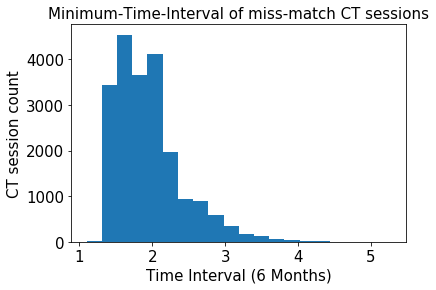

In [58]:
import matplotlib.pyplot as plt

factor_list = list(sess_nodsize.values())
factor_list = [np.log(i) for i in factor_list]
print (np.mean(factor_list), np.std(factor_list), np.max(factor_list), np.min(factor_list))
plt.hist(factor_list,  bins=20)  # `density=False` would make counts

plt.title('Minimum-Time-Interval of miss-match CT sessions', fontsize =15 )
plt.ylabel('CT session count', fontsize =15)
plt.xlabel('Time Interval (6 Months)', fontsize =15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [59]:
# update the csv with nodule_size, spiculation, upperlobe

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/MissClinic/NLST_vlspformat.csv')
nodule_size, spiculation, upperlobe = [], [], []

for i, item in df.iterrows():
    if item['sess'] in sess_nodsize.keys():
        nodule_size.append(sess_nodsize[item['sess']])
        spiculation.append(sess_spic[item['sess']])
        upperlobe.append(sess_upper[item['sess']])
    else:
        nodule_size.append('')
        spiculation.append('')
        upperlobe.append('')
        
df['nodule_size'] = nodule_size
df['spiculation'] = spiculation
df['upperlobe'] = upperlobe

df.to_csv('/nfs/masi/gaor2/data/Cotrain/MissClinic/NLST_vlspformat.csv', index = False)


In [5]:
# update the csv with sct_pre_att
df = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/Spiral CT Abnormalities/sct_abnormalities.data.d100517.csv')
sess_type, sess_nodsize =  {}, {}
study_yr_dict = {0: '1999', 1: '2000', 2: '2001'}
for i, item in df.iterrows():
    if item['sct_pre_att'] == item['sct_pre_att'] :
        
        sess = str(item['pid']).replace('.0', '') + 'time' + study_yr_dict[item['study_yr']]
        if sess in sess_nodsize.keys() and item['sct_long_dia'] <= sess_nodsize[sess]:
            continue
        else:
            sess_nodsize[sess] = item['sct_long_dia']
            sess_type[sess] = item['sct_pre_att']
            
data_root = '/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv'
df = pd.read_csv(data_root)
nodule_size, Type= [], []

for i, item in df.iterrows():
    if item['sess'] in sess_nodsize.keys():
        nodule_size.append(sess_nodsize[item['sess']])
        Type.append(sess_type[item['sess']])
        
    else:
        nodule_size.append('')
        Type.append('')

        
df['Type'] = Type

df.to_csv(data_root, index = False)
            

In [8]:
# update the csv with Lung-RADS

df = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/Lung-RADS data/lungrads1.csv')
df.keys()
sess_lungradspad = {}
sess_lungrads = {}
for i, item in df.iterrows():
    
    sess0 = str(item['pid']).replace('.0', '') + 'time1999'
    sess1 = str(item['pid']).replace('.0', '') + 'time2000'
    sess2 = str(item['pid']).replace('.0', '') + 'time2001'
    
    sess_lungrads[sess0] = item['slungrad0']
    sess_lungrads[sess1] = item['slungrad1']
    sess_lungrads[sess2] = item['slungrad2']
    
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
lungrads = []
for i, item in df.iterrows():
    lungrads.append(sess_lungrads[item['sess']])
df['lungrads'] = lungrads
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv', index = False)
    


In [ ]:
# update the csv with recommendation

In [ ]:
# update comparison between the screening reader

In [54]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv')
Log_nodsize = []
 
for i, item in df.iterrows():
    if item['nodule_size'] == item['nodule_size']:
        log_nsize = min(5, max(1, np.log(item['nodule_size']))) 
        Log_nodsize.append((log_nsize - 1) / 4 + 0.01)
    # the same as clinical_spore/mcl_data.ipynb
    else:
        Log_nodsize.append('')
df['Log_nodsize'] = Log_nodsize
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv', index = False)
    

In [53]:
import numpy as np
def Mayo(age, ciga, cancer, diameter, spicul, upper):
    # ciga == 1 means current or former smoker. 
    ori_val = -6.827 + 0.0391 * age + 0.7917 * ciga +  1.3388 * cancer + 0.1274 * diameter + 1.0407 * spicul + 0.7838 * upper
    prob = np.exp(ori_val) / (1 + np.exp(ori_val))
    return round(ori_val, 3), round(prob, 3)

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
mayo_risk = []  
for i, item in df.iterrows():
    if item['age_correct'] == item['age_correct'] and item['phist'] == item['phist'] and item['nodule_size'] == item['nodule_size']:
        age = item['age_correct']
        ciga = 1
        cancer = item['phist']
        diameter = item['nodule_size_new']
        spicul = item['spiculation_new'] 
        upper  = item['upperlobe_new']
        _, mayo = Mayo(age, ciga, cancer, diameter, spicul, upper)
    else:
        mayo = ''
    mayo_risk.append(mayo)
    
df['mayo_risk_new']  = mayo_risk

df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv', index = False)


In [6]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
sess_mayo = {}
for i, item in df.iterrows():
    sess_mayo[item['sess']] = item['mayo_risk']
    
csv_path = '/nfs/masi/gaor2/saved_file/Clinical_spore/0620/all/test4/test4_35.csv'
df = pd.read_csv(csv_path)
mayo = []
for i, item in df.iterrows():
    mayo.append(sess_mayo[item['ID_list'].replace('.npy', '')])
    
df['mayo_risk'] = mayo
df.to_csv(csv_path, index = False)

In [8]:
# correct gender for NLST_withimage_norm.csv # M: 0, F: 1
data_path = '/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv'
df = pd.read_csv(data_path)
gender = df['gender'].tolist()
gender = [i - 1 for i in gender]
df['gender'] = gender
df.to_csv(data_path, index = False)

In [17]:
# add the kaggle risk to nlst_pos1yr.csv

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv')

sess_kaggle = {}
for i, item in df.iterrows():
    sess_kaggle[item['sess']] = item['kaggle_cancer']
    
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr.csv')
kaggle_risk = []
for i, item in df.iterrows():
    try:
        kaggle_risk.append(sess_kaggle[item['item'].replace('.nii.gz', '')])
    except:
        kaggle_risk.append('')
df['kaggle_risk'] = kaggle_risk
df.to_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr.csv', index = False)



In [24]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv')
#print (list(df.keys()))
df = df.loc[df['subfold'] == 'withlabel']
subj_withlabel = df['subject'].tolist() 
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr.csv')
pos1yr = df['subject'].tolist()
print (set(pos1yr) - set(subj_withlabel))

{202128, 120849, 209874}


In [35]:
# assure that the phase split is same for nlst_pos1yr.csv and NSLT_withimage.csv
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr.csv')
subj_phase = df.loc[df['phase'] == 4]['subject'].tolist()
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv')
subj_phase2 = df.loc[df['phase'] != 4]['subject'].tolist()
print (set(subj_phase2) & set(subj_phase))

set()


In [37]:
# temp 
data_list = os.listdir('/nfs/masi/NLST/DSB_File/diag/prep')
data_list2 = os.listdir('/nfs/masi/NLST/DSB_File/diag_second/prep')
print (set(data_list) & set(data_list2)) 
print (len(data_list), len(data_list2))

set()
32112 2414


In [45]:
# add nlst trained result to NLST_withimage_norm
data_root = '/nfs/masi/gaor2/data/NLST/NLSTtrain_Feat/phase4'
nlst_risk = {}
df1 = pd.read_csv(data_root + '/noreport1_20200813.csv' )
df2 = pd.read_csv(data_root + '/noreport2_20200813.csv' )
df3 = pd.read_csv(data_root + '/noreport3_20200813.csv' )
df4 = pd.read_csv(data_root + '/noreport4_20200813.csv' )
df5 = pd.read_csv(data_root + '/noreport5_20200813.csv' )
dfother = pd.read_csv(data_root + '/other_20200813.csv' )
dflabel = pd.read_csv(data_root + '/withlabel_20200813.csv' )
for df in [df1, df2, df3, df4, df5, dfother, dflabel]:
    for i, item in df.iterrows():
        nlst_risk[item['id']] = item['cancer']
        


df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv')
nlsttrain_risk = []
for i, item in df.iterrows():
    nlsttrain_risk.append(nlst_risk[item['sess']])
df['nlsttrain_phase4_risk'] = nlsttrain_risk
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage_norm.csv', index = False)


In [46]:
# create balanced item for NLST: 
# create balance subcohort
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/missclinic/NLST_withimage_norm.csv')
need_factor = ['age', 'education',  'gender',  'bmi',  'race', 'quit_time',  'cigsmok', 'pkyr', 'copd', 'phist', 'fhist', 'Log_nodsize', 'spiculation', 'upperlobe'] 
df = df.query('lastitem == 1')
for factor in need_factor:
    df = df.loc[df[factor] == df[factor]]
df_pos = df.query('gt_reg == 1')
df_neg = df.query('gt_reg == 0')
pos_set = list(set(df_pos['subject']))
neg_set = np.array(list(set(df_neg['subject'])))
np.random.seed(0)

idx = np.array(range(len(neg_set)))
random.shuffle(idx)
idx_1000 = idx[:1000]
neg_set_1000 = list(neg_set[idx_1000])

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/missclinic/NLST_withimage_norm.csv')
in_neg_1000 = []
for i, item in df.iterrows():
    if item['subject'] in pos_set or item['subject'] in neg_set_1000:
        in_neg_1000.append(1)
    else:
        in_neg_1000.append(0)

df['in_neg_1000'] = in_neg_1000
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/missclinic/NLST_withimage_norm.csv', index = False)



Index(['subject', 'sess', 'age', 'education', 'gender', 'bmi', 'race',
       'quit_time', 'cigsmok', 'smo_status', 'pkyr', 'smokeage', 'smokeday',
       'smokeyr', 'screentime', 'conflc', 'gt_reg', 'diag_dis', 'copd',
       'phist', 'fhist', 'phase', 'lastitem', 'duration', 'intensity',
       'subfold', 'source', 'noempty', 'plco', 'islong', 'with2yr',
       'kaggle_cancer', 'nodule_size', 'spiculation', 'upperlobe',
       'Log_nodsize', 'mayo_risk', 'nlsttrain_phase0_risk',
       'nlsttrain_phase1_risk', 'nlsttrain_phase2_risk',
       'nlsttrain_phase3_risk', 'nlsttrain_phase4_risk'],
      dtype='object')